In [1]:
import logging
import geopandas
from u8001 import vridownload
from shapely.geometry import shape
import time

In [2]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
ch.setFormatter(formatter)

In [3]:
wfs = vridownload.WFS_downloader()
#d = wfs.get_data('WHSE_IMAGERY_AND_BASE_MAPS.GSR_AIRPORTS_SVW')

page_size = 10000
start_index = 0
#bbox queries
bbox_WGS84 = (49.25, -118.96, 49.59, -118.67,"urn:ogc:def:crs:EPSG:4326")
bbox_albers = (1491867, 480179, 1567106, 566654,"urn:ogc:def:crs:EPSG:3005")
# Format of cql
# WITHIN(GEOMETRY,POLYGON((830772.7 367537.4, 1202463 367537.4, 1202463 651616.7, 830772.7 651616.7, 830772.7 367537.4)))
#bbox = (1651427, 604341, 1653929, 607218)

# wfs.to_geojson(response,'test.geojson')

In [5]:
tsa = wfs.from_geojson('../tsa.geojson')
tsa_wkt = shape(tsa['features'][0]["geometry"]).wkt
cql = f"INTERSECTS(GEOMETRY,{tsa_wkt})"
start = time.time()
logger.debug("Starting to get data... ")
response = wfs.get_data(dataset='WHSE_FOREST_VEGETATION.VEG_COMP_LYR_R1_POLY', query=cql)
dtime = time.time() - start
logger.debug(f'process took {round(dtime)} seconds')
# tsa = wfs.to_geojson(response,'boundary_vri.geojson')

DEBUG:__main__:process took 103 seconds


In [6]:
logger.debug(f'Writing {len(response)} features to geodataframe')
start = time.time()
df = wfs.to_df(response)
dtime = time.time() - start
logger.debug(f'process took {round(dtime)} seconds')

DEBUG:__main__:Writing 65008 features to geodataframe
DEBUG:__main__:process took 5 seconds


<Axes: >

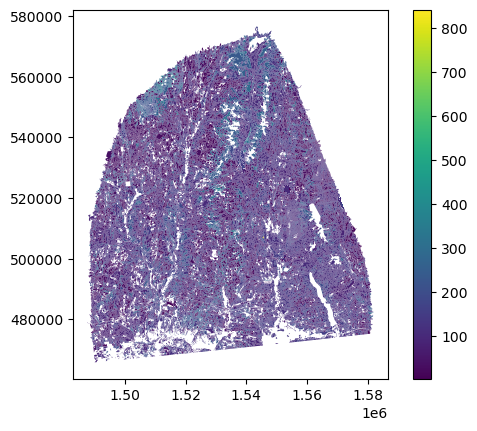

In [8]:
df.plot("PROJ_AGE_1",legend=True)